## Feature Importance using Lasso Regression

In [26]:
pip install category_encoders

  Obtaining dependency information for category_encoders from https://files.pythonhosted.org/packages/7f/e5/79a62e5c9c9ddbfa9ff5222240d408c1eeea4e38741a0dc8343edc7ef1ec/category_encoders-2.6.3-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/81.9 kB ? eta -:--:--
   ----- ---------------------------------- 10.2/81.9 kB ? eta -:--:--
   ------------------------------ --------- 61.4/81.9 kB 825.8 kB/s eta 0:00:01
   ---------------------------------------- 81.9/81.9 kB 918.2 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
# Laod libraries

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error,r2_score
from category_encoders.ordinal import OrdinalEncoder

sns.set_context("talk")

In [2]:
# read data

stock_df = pd.read_csv('D:/PhD_project/data/tidy_data/new_predictors.csv', index_col = ['unique_id'])

stock_df.head()

,yearmonth,region,district,site_code,product_code,product_type,stock_distributed,id,zero_per,zero_per_q,...,moving_median_12,moving_std_4,moving_std_6,moving_std_12,rolling_max_4,rolling_max_6,rolling_max_12,rolling_zero_per_4,rolling_zero_per_6,rolling_zero_per_12
unique_id,,,,,,,,,,,,,,,,,,,,,
2016 JanC1014AS27137,2016-01-01,ABIDJAN 1-GRANDS PONTS,ADJAME-PLATEAU-ATTECOUBE,C1014,AS27137,Contraceptive Implant,0,C1014AS27137,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016 JanC1080AS27137,2016-01-01,ABIDJAN 2,ABOBO-EST,C1080,AS27137,Contraceptive Implant,0,C1080AS27137,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016 JanC4019AS21126,2016-01-01,N'ZI-IFOU-MORONOU,DAOUKRO,C4019,AS21126,Injectable Contraceptive,0,C4019AS21126,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016 JanC4019AS17005,2016-01-01,N'ZI-IFOU-MORONOU,DAOUKRO,C4019,AS17005,Female Condom,0,C4019AS17005,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016 JanC1080AS27138,2016-01-01,ABIDJAN 2,ABOBO-EST,C1080,AS27138,Contraceptive Implant,0,C1080AS27138,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# prepare training and test datasets

stock_tidy = stock_df.drop(['id', 'region', 'district', 'product_code', 'site_code', 'product_type', 'site_type'], axis = 1)

train = stock_tidy[stock_tidy['yearmonth'] <= '2019-06-30']
train = train.drop(['yearmonth'], axis = 1)

test1 = stock_tidy[stock_tidy['yearmonth'] > '2019-06-30']
test = test1[test1['yearmonth'] <= '2019-09-30']
test = test.drop(['yearmonth'], axis = 1)

val = stock_tidy[stock_tidy['yearmonth'] > '2019-09-30']
val = val.drop(['yearmonth'], axis = 1)

X_train = train.drop(['stock_distributed'], axis = 1)
y_train = train["stock_distributed"]

X_test = test.drop(['stock_distributed'], axis = 1)
y_test = test["stock_distributed"]

X_val = val.drop(['stock_distributed'], axis = 1)
y_val = val["stock_distributed"]

## Lasso Rgrression

In [4]:
# Create the data matrix and target variable
# We standardise the features and target so
# we can use LASSO for feature selection

y = y_train

X = X_train

features = X_train.columns

C:\Users\chama\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.835e+06, tolerance: 5.970e+03
  model = cd_fast.enet_coordinate_descent(


<Axes: >

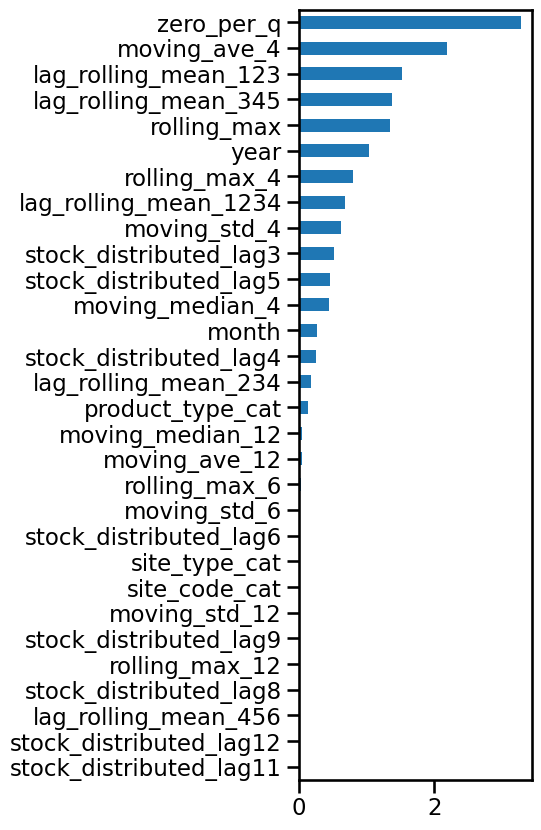

In [5]:
# Now let's use LASSO

model = Lasso(alpha = 0.1)

model.fit(X, y)

feat_importances = pd.Series(index=features, data=model.coef_)

feat_importances.abs().nlargest(30).iloc[::-1].plot(kind="barh", figsize=(3, 10))

In [6]:
print('R squared training set', round(model.score(X, y)*100, 2))

R squared training set 82.12


C:\Users\chama\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.169e+06, tolerance: 5.970e+03
  model = cd_fast.enet_coordinate_descent(
C:\Users\chama\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.008e+06, tolerance: 5.970e+03
  model = cd_fast.enet_coordinate_descent(
C:\Users\chama\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.849e+06, toleranc

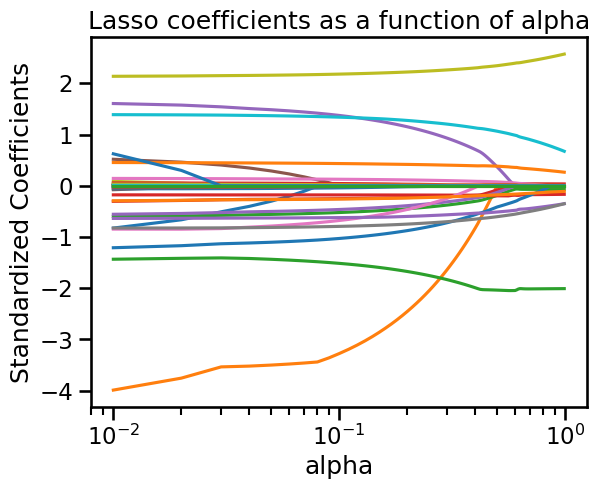

In [7]:
# coefficients in Lasso regression may vary according to the determined alpha parameter

# Coefficients for different lambda values.

alphas = [x / 100.0 for x in range(1, 100, 1)]
lasso = Lasso(max_iter=1000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X, y)
    coefs.append(lasso.coef_)

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Standardized Coefficients')
plt.title('Lasso coefficients as a function of alpha');

In [8]:
# cross validation to get the best alpha

from sklearn.linear_model import LassoCV

# Lasso with 5 fold cross-validation
model = LassoCV(cv=5, random_state=0, max_iter=1000)

# Fit model
model.fit(X, y)

LassoCV(cv=5, max_iter=1000, random_state=0)

model.alpha_

4.8715635249880895

In [9]:
## Best lasso model

lasso_best = Lasso(alpha=model.alpha_)

lasso_best.fit(X, y)

Lasso(alpha=4.8715635249880895)

In [10]:
print('R squared training set', round(lasso_best.score(X, y)*100, 2))

R squared training set 81.63


<Axes: >

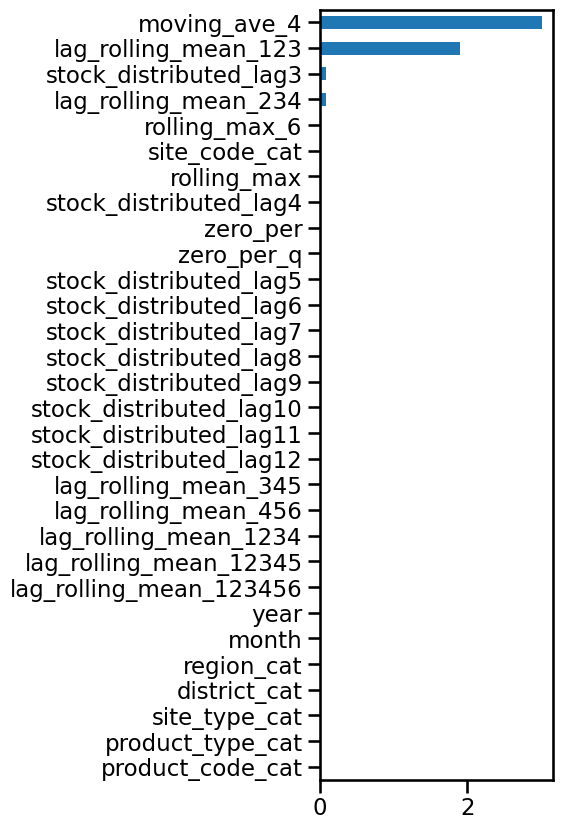

In [11]:
# Feature importance

feat_importances = pd.Series(index=features, data=lasso_best.coef_)

feat_importances.abs().nlargest(30).iloc[::-1].plot(kind="barh", figsize=(3, 10))

(0.020726554164548612,
 41.35491244368516,
 -7.446868547552839,
 1948.6475470746213)

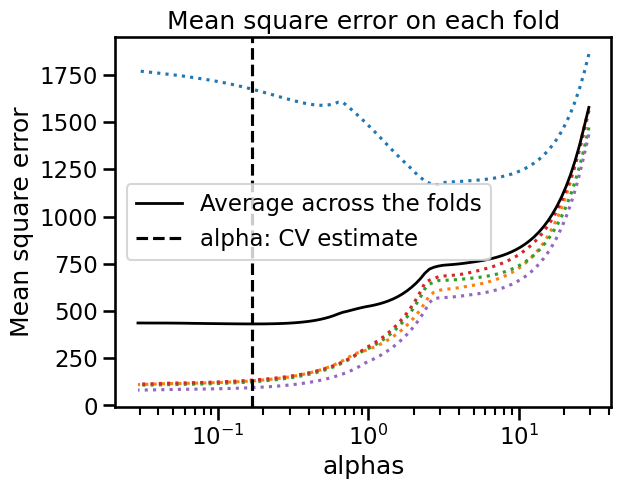

In [14]:
plt.semilogx(model.alphas_, model.mse_path_, ":")
plt.plot(
    model.alphas_ ,
    model.mse_path_.mean(axis=-1),
    "k",
    label="Average across the folds",
    linewidth=2,
)
plt.axvline(
    model.alpha_, linestyle="--", color="k", label="alpha: CV estimate"
)

plt.legend()
plt.xlabel("alphas")
plt.ylabel("Mean square error")
plt.title("Mean square error on each fold")
plt.axis("tight")


In [15]:
top_features = pd.DataFrame(feat_importances.abs().nlargest(20)).reset_index()

In [16]:
## Save results

top_features.to_csv('D:/PhD_project/data/predictions/lasso_features.csv', index = True)

In [17]:
top_features_list = top_features['index'].tolist()

In [18]:
top_features_list

['rolling_max',
 'lag_rolling_mean_123',
 'moving_ave_4',
 'moving_std_4',
 'moving_median_4',
 'lag_rolling_mean_234',
 'stock_distributed_lag3',
 'year',
 'zero_per_q',
 'month',
 'moving_ave_6',
 'moving_median_12',
 'stock_distributed_lag4',
 'product_type_cat',
 'site_type_cat',
 'site_code_cat',
 'zero_per',
 'stock_distributed_lag5',
 'stock_distributed_lag6',
 'stock_distributed_lag7']